In [1]:
import os
import glob
import matplotlib.pyplot as plt

import pickle
import pandas as pd
import glob

import numpy as np
import xarray as xr

# Open a Sample Dahiti file

In [2]:
dahiti_folder = "../../data/Dahiti/Somalia"

In [3]:
import os

files = os.listdir(dahiti_folder)
print(files)


['11720_water_level_altimetry.nc', '11854_water_level_altimetry.nc', '11965_water_level_altimetry.nc', '12044_water_level_altimetry.nc', '12292_water_level_altimetry.nc', '12332_water_level_altimetry.nc', '19926_water_level_altimetry.nc', '24167_water_level_altimetry.nc', '24170_water_level_altimetry.nc', '24169_water_level_altimetry.nc']


In [4]:
file_1 = files[0]
file_1

'11720_water_level_altimetry.nc'

In [5]:
full_file_path = os.path.join(dahiti_folder, file_1)
file_1_nc = xr.open_dataset(full_file_path)
file_1_nc


datetime_series = pd.to_datetime(file_1_nc.datetime.values)
datetime_series



DatetimeIndex(['2016-04-26 19:09:36', '2016-05-23 19:09:38',
               '2016-06-19 19:09:40', '2016-10-05 19:09:42',
               '2016-11-01 19:09:39', '2016-11-28 19:09:37',
               '2016-12-25 19:09:38', '2017-01-21 19:09:40',
               '2017-02-17 19:09:39', '2017-03-16 19:09:38',
               '2017-05-09 19:09:46', '2017-09-21 19:09:41',
               '2017-10-18 19:09:45', '2017-11-14 19:09:44',
               '2017-12-11 19:09:41', '2018-01-07 19:09:45',
               '2018-03-02 19:09:45', '2018-04-25 19:09:49',
               '2018-05-22 19:09:49', '2018-06-18 19:09:50',
               '2018-07-15 19:09:49', '2018-08-11 19:09:46',
               '2018-09-07 19:09:45', '2018-10-04 19:09:49',
               '2018-10-31 19:09:50', '2018-11-27 19:09:47',
               '2018-12-24 19:09:45', '2019-01-20 19:09:48',
               '2019-02-16 19:09:49', '2019-03-15 19:09:46',
               '2019-04-11 19:09:52', '2019-05-08 19:09:55',
               '2019-07-

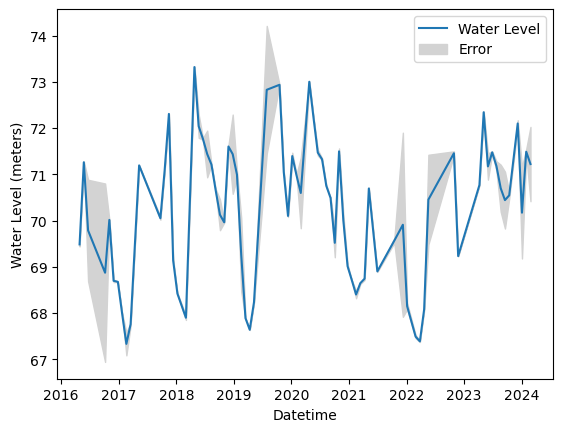

In [8]:
# import matplotlib.dates as mdates


plt.plot(datetime_series, file_1_nc.water_level.values, label='Water Level')

# Fill between water level + error and water level - error
plt.fill_between(datetime_series, file_1_nc.water_level.values + file_1_nc.error.values, file_1_nc.water_level.values - file_1_nc.error.values, color='lightgrey', label = "Error")



plt.xlabel('Datetime')
plt.ylabel('Water Level (meters)')
plt.legend()

# Show the plot
plt.show()


# Import Somalia dataset

In [7]:
import pandas as pd

df = pd.read_csv("../../data/somalia_combined_df.csv")
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [10]:
def plot_flow_and_level(df, file_nc):
    datetime_series = pd.to_datetime(file_nc.datetime.values)
    datetime_series


    marker_size = 3

    fig, axes = plt.subplots(3, 1)

    # Plot flow data
    axes[0].scatter(df.index, df["jb001_flow"], label="jb001_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["jb002_flow"], label="jb002_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["jb009_flow"], label="jb009_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["snfra_flow"], label="snrfa_flow_data", s = marker_size)

    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Flow (m3/s)")
    axes[0].legend()

    # Plot water level data
    axes[1].scatter(df.index, df["jb001_level"], label="jb001_water_level", s = marker_size)
    axes[1].scatter(df.index, df["jb002_level"], label="jb002_water_level", s = marker_size)
    axes[1].scatter(df.index, df["jb009_level"], label="jb009_level_data", s = marker_size)
    axes[1].scatter(df.index, df["snfra_level"], label="snrfa_level_data", s = marker_size)
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Water Level (m)")
    axes[1].legend()

    axes[2].plot(datetime_series, file_nc.water_level.values, label='Water Level')

    # Fill between water level + error and water level - error
    axes[2].fill_between(datetime_series, file_nc.water_level.values + file_nc.error.values, file_nc.water_level.values - file_nc.error.values, color='lightgrey', label = "Error")



    axes[2].xlabel('Date')
    axes[2].ylabel('Altimetric Water Level (meters)')
    axes[2].legend()

    # Show the plot
    plt.show()

    plt.tight_layout()
    plt.show()

In [19]:
def plot_flow_and_level(df, file_nc):
    datetime_series = pd.to_datetime(file_nc.datetime.values)
    datetime_series


    marker_size = 3

    fig, axes = plt.subplots(3, 1, sharex=True)

    # Plot flow data
    axes[0].scatter(df.index, df["jb001_flow"], label="jb001_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["jb002_flow"], label="jb002_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["jb009_flow"], label="jb009_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["snfra_flow"], label="snrfa_flow_data", s = marker_size)

    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Flow (m3/s)")
    axes[0].legend()

    # Plot water level data
    axes[1].scatter(df.index, df["jb001_level"], label="jb001_water_level", s = marker_size)
    axes[1].scatter(df.index, df["jb002_level"], label="jb002_water_level", s = marker_size)
    axes[1].scatter(df.index, df["jb009_level"], label="jb009_level_data", s = marker_size)
    axes[1].scatter(df.index, df["snfra_level"], label="snrfa_level_data", s = marker_size)
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Water Level (m)")
    axes[1].legend()

    axes[2].plot(datetime_series, file_nc.water_level.values, label='Water Level')

    # Fill between water level + error and water level - error
    axes[2].fill_between(datetime_series, file_nc.water_level.values + file_nc.error.values, file_nc.water_level.values - file_nc.error.values, color='lightgrey', label = "Error")


# fig, axes = plt.subplots(3, 1, sharex=True)

# # Plot flow data
# axes[0].scatter(df.index, df["jb001_flow"], label="jb001_flow_data", s=marker_size)
# axes[0].scatter(df.index, df["jb002_flow"], label="jb002_flow_data", s=marker_size)
# axes[0].scatter(df.index, df["jb009_flow"], label="jb009_flow_data", s=marker_size)
# axes[0].scatter(df.index, df["snfra_flow"], label="snrfa_flow_data", s=marker_size)
# axes[0].set_ylabel("Flow (m3/s)")
# axes[0].legend()

# # Plot water level data
# axes[1].scatter(df.index, df["jb001_level"], label="jb001_water_level", s=marker_size)
# axes[1].scatter(df.index, df["jb002_level"], label="jb002_water_level", s=marker_size)
# axes[1].scatter(df.index, df["jb009_level"], label="jb009_level_data", s=marker_size)
# axes[1].scatter(df.index, df["snfra_level"], label="snrfa_level_data", s=marker_size)
# axes[1].set_ylabel("Water Level (m)")
# axes[1].legend()

# # Plot altimetric water level
# axes[2].plot(datetime_series, file_1_nc.water_level.values, label='Water Level')
# axes[2].fill_between(datetime_series, file_1_nc.water_level.values + file_1_nc.error.values, file_1_nc.water_level.values - file_1_nc.error.values, color='lightgrey', label="Error")
# axes[2].set_xlabel('Date')
# axes[2].set_xlabel('Date')  # Fix: Replace xlabel with set_xlabel
plt.show()


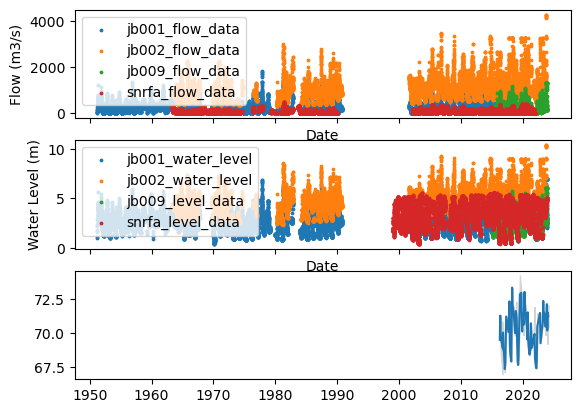

In [20]:
plot_flow_and_level(df, file_1_nc)

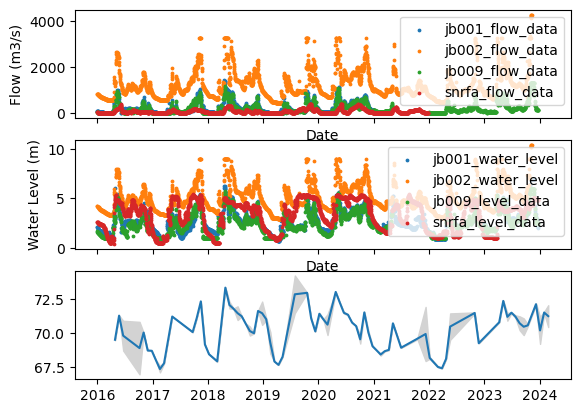

In [21]:
plot_flow_and_level(df[df.index.year > 2015], file_1_nc)